In [98]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [37]:
# Read in the data
cities_2016_df = pd.read_csv('cities_by_date_2016.csv')
cities_2016_df.dropna(inplace=True, axis=1)

# Add a column which tells us if it's a holiday
holidays_df = pd.read_csv('retail_holidays.csv')
def check_if_holiday(d):
    result = False
    for h in holidays_df['2016 Year']:
        if d in h: result = True
    
    return result

cities_2016_df['Is_Holiday'] = cities_2016_df['Date'].apply(check_if_holiday)
cities_2016_df['Is_Holiday_int'] = cities_2016_df['Date'].apply(lambda h: int(check_if_holiday(h)))


# Add a timestamp column
cities_2016_df['timestamp'] = cities_2016_df['Date'].apply(lambda ts: datetime.datetime.strptime(ts, '%m/%d/%Y'))

column_names = list(cities_2016_df)
cities = ['Austin', 'Chicago', 'LA']

# Add a total crime column for each city
for c in cities:
    total_column_name = 'Total_Crimes_' + c
    cities_2016_df[total_column_name] = 0
    for col in column_names:
        if c in col:
            cities_2016_df[total_column_name] = cities_2016_df[total_column_name] + cities_2016_df[col]

cities_2016_holidays_df = cities_2016_df[(cities_2016_df.Is_Holiday_int > 0)]
cities_2016_non_holidays_df = cities_2016_df[(cities_2016_df.Is_Holiday_int < 1) &
                                            (cities_2016_df.Total_Crimes_LA < 200000)]

cities_2016_non_holidays_df.tail()

,Date,BURGLARY_Austin,BURGLARY_Chicago,BURGLARY_LA,BURGLARY_Cities,THEFT_Austin,THEFT_Chicago,THEFT_LA,THEFT_Cities,AGGRASSAULT_Austin,...,DRUG_Austin,DRUG_Chicago,FRAUD_Austin,FRAUD_Chicago,Is_Holiday,Is_Holiday_int,timestamp,Total_Crimes_Austin,Total_Crimes_Chicago,Total_Crimes_LA
360,12/26/2016,25,63,74,162,67,90,67,224,7,...,1,11,1,28,False,0,2016-12-26 00:00:00,108,498,510
361,12/27/2016,29,79,87,195,89,92,74,255,6,...,0,28,1,46,False,0,2016-12-27 00:00:00,136,506,569
362,12/28/2016,34,87,90,211,99,98,82,279,7,...,0,19,2,41,False,0,2016-12-28 00:00:00,152,548,606
363,12/29/2016,27,57,81,165,102,87,107,296,5,...,0,29,1,39,False,0,2016-12-29 00:00:00,143,515,543
364,12/30/2016,26,81,84,191,100,102,85,287,9,...,1,27,1,43,False,0,2016-12-30 00:00:00,160,581,589


<IPython.core.display.Javascript object>


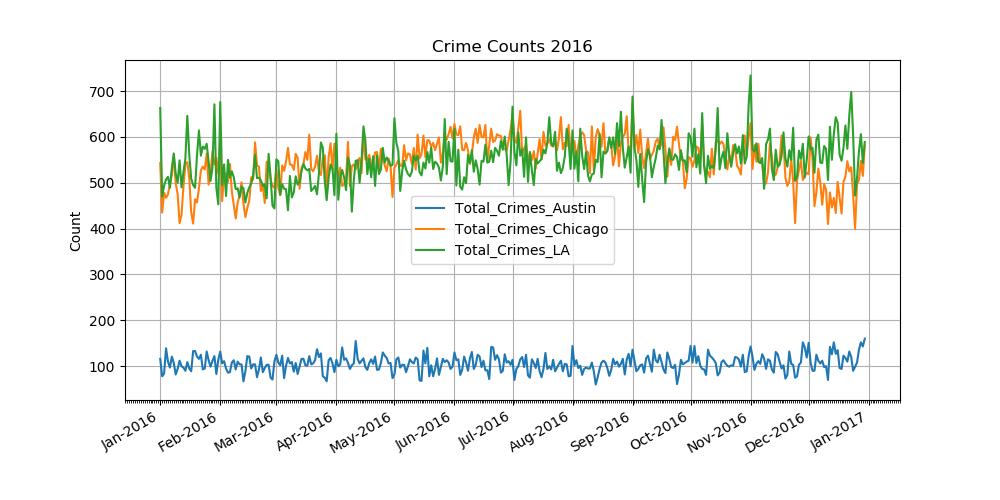

In [68]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()


ax.plot(cities_2016_df['timestamp'][:365], cities_2016_df['Total_Crimes_Austin'][:365])
ax.plot(cities_2016_df['timestamp'][:365], cities_2016_df['Total_Crimes_Chicago'][:365])
ax.plot(cities_2016_df['timestamp'][:365], cities_2016_df['Total_Crimes_LA'][:365])

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('Crime Counts 2016')

fig.autofmt_xdate()

plt.show()

<IPython.core.display.Javascript object>


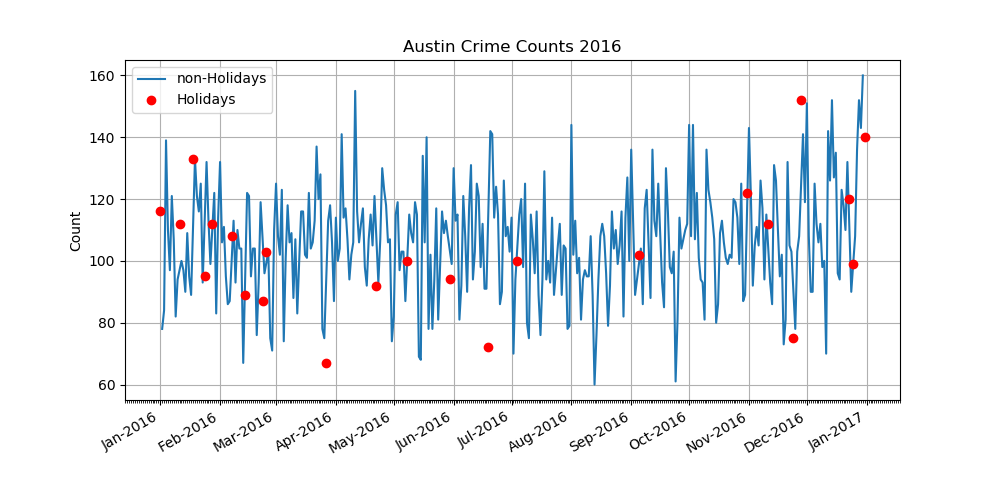

In [67]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()


ax.plot(cities_2016_non_holidays_df['timestamp'],
        cities_2016_non_holidays_df['Total_Crimes_Austin'], label="non-Holidays")

ax.plot(cities_2016_holidays_df['timestamp'],
        cities_2016_holidays_df['Total_Crimes_Austin'], 'o', c='r', label="Holidays")

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('Austin Crime Counts 2016')

fig.autofmt_xdate()

plt.show()

<IPython.core.display.Javascript object>


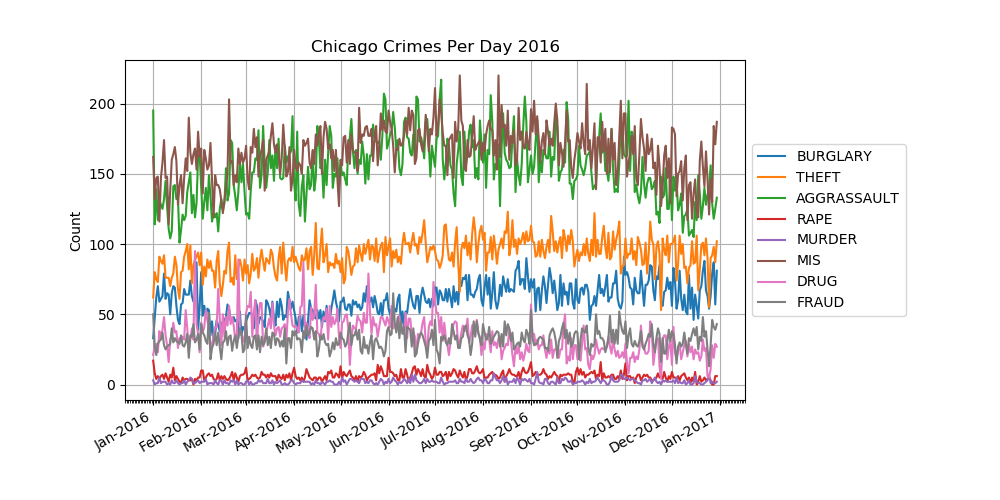

In [66]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()


for crime_type in list(cities_2016_df):
    if '_Chicago' in crime_type and 'Total' not in crime_type:
        ax.plot(cities_2016_df['timestamp'][:365], cities_2016_df[crime_type][:365], label=crime_type.strip('_Chicago'))

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('Chicago Crimes Per Day 2016')

fig.autofmt_xdate()

# Put the legend to the right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<IPython.core.display.Javascript object>


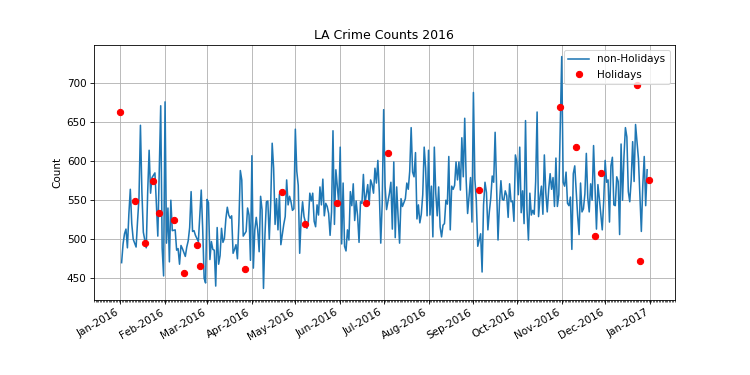

In [127]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()


ax.plot(cities_2016_non_holidays_df['timestamp'],
        cities_2016_non_holidays_df['Total_Crimes_LA'], label="non-Holidays")

ax.plot(cities_2016_holidays_df['timestamp'],
        cities_2016_holidays_df['Total_Crimes_LA'], 'o', c='r', label="Holidays")

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('LA Crime Counts 2016')

fig.autofmt_xdate()

plt.show()

<IPython.core.display.Javascript object>


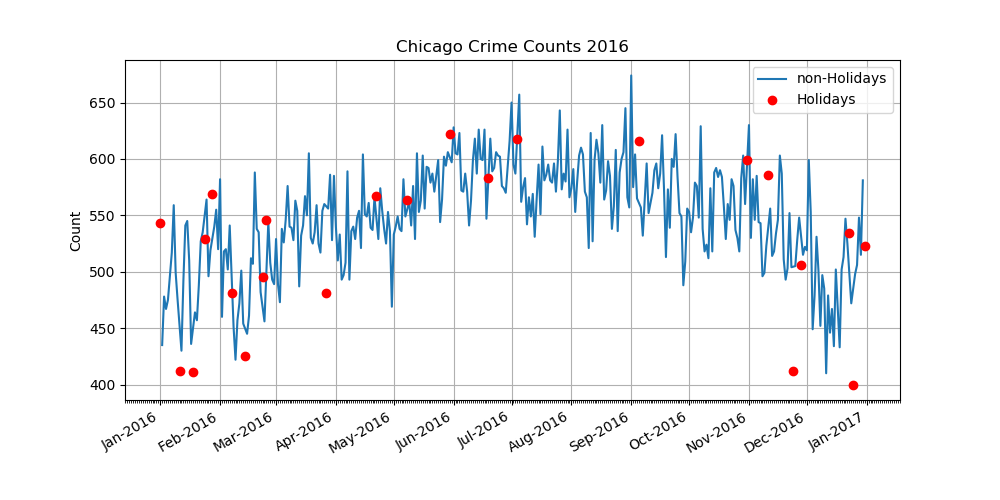

In [64]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()


ax.plot(cities_2016_non_holidays_df['timestamp'],
        cities_2016_non_holidays_df['Total_Crimes_Chicago'], label="non-Holidays")

ax.plot(cities_2016_holidays_df['timestamp'],
        cities_2016_holidays_df['Total_Crimes_Chicago'], 'o', c='r', label="Holidays")

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('Chicago Crime Counts 2016')

fig.autofmt_xdate()

plt.show()

<IPython.core.display.Javascript object>


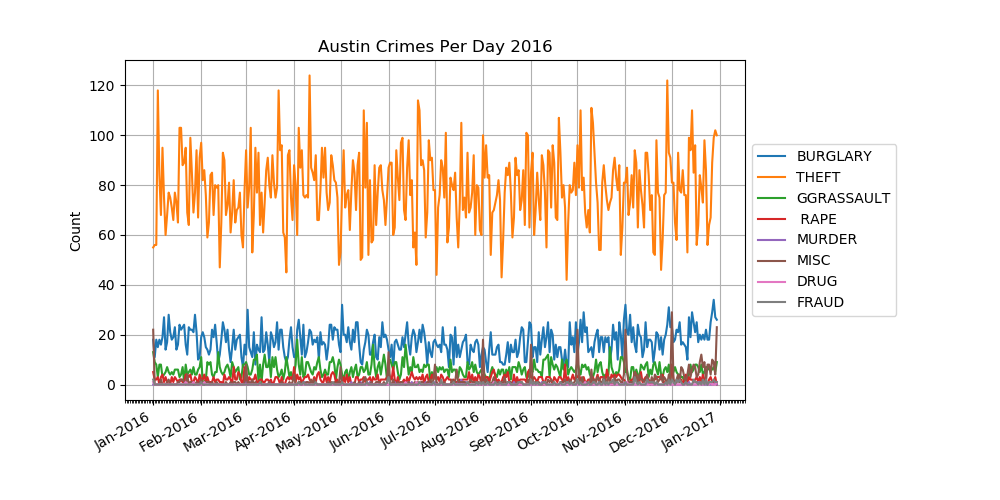

In [69]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()

for crime_type in list(cities_2016_df):
    if '_Austin' in crime_type and 'Total' not in crime_type:
        ax.plot(cities_2016_df['timestamp'][:365], cities_2016_df[crime_type][:365], label=crime_type.strip('_Austin'))

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('Austin Crimes Per Day 2016')

fig.autofmt_xdate()

# Put the legend to the right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<IPython.core.display.Javascript object>


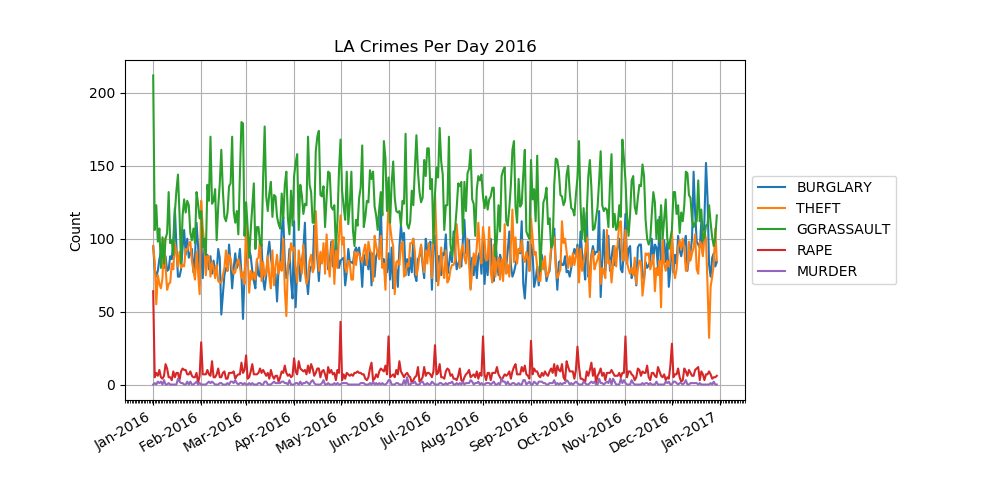

In [70]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()

for crime_type in list(cities_2016_df):
    if '_LA' in crime_type and 'Total' not in crime_type:
        ax.plot(cities_2016_df['timestamp'][:365], cities_2016_df[crime_type][:365], label=crime_type.strip('_LA'))

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('LA Crimes Per Day 2016')

fig.autofmt_xdate()

# Put the legend to the right
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<IPython.core.display.Javascript object>


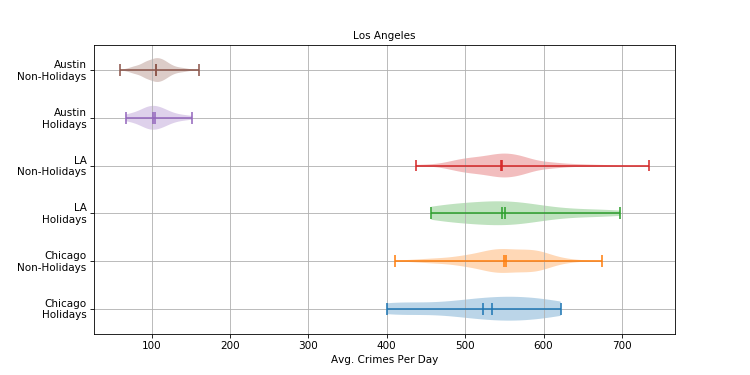

In [126]:


fig, ax = plt.subplots(figsize=(10, 5), sharey=True, sharex=True)


# Chicago
ax.violinplot(cities_2016_holidays_df['Total_Crimes_Chicago'], [1], vert=False,
                      showmeans=True, showextrema=True, showmedians=True)

ax.violinplot(cities_2016_non_holidays_df['Total_Crimes_Chicago'], [2], vert=False,
                      showmeans=True, showextrema=True, showmedians=True)

ax.set_title('Chicago', fontsize=fs)


# LA
ax.violinplot(cities_2016_holidays_df['Total_Crimes_LA'], [3], vert=False,
                      showmeans=True, showextrema=True, showmedians=True)

ax.violinplot(cities_2016_non_holidays_df['Total_Crimes_LA'], [4], vert=False,
                      showmeans=True, showextrema=True, showmedians=True)

ax.set_title('Los Angeles', fontsize=fs)


# Austin
ax.violinplot(cities_2016_holidays_df['Total_Crimes_Austin'], [5], vert=False, 
                      showmeans=True, showextrema=True, showmedians=True)

ax.violinplot(cities_2016_non_holidays_df['Total_Crimes_Austin'], [6], vert=False, 
                      showmeans=True, showextrema=True, showmedians=True)

ax.set_xlabel('Avg. Crimes Per Day')

ax.set_yticklabels(['', 'Chicago\nHolidays', 'Chicago\nNon-Holidays',
                    'LA\nHolidays', 'LA\nNon-Holidays',
                    'Austin\nHolidays', 'Austin\nNon-Holidays'
                   ])
ax.grid()
#ax.title('')